In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [2]:
train = pd.read_csv('price_data_tr.csv')
val = pd.read_csv('price_data_val.csv')
test = pd.read_csv('price_data_ts.csv')

In [3]:
# KEEPING A COPY OF TRAIN AND TEST DB FOR FURTHER USAGE
rawTrain = train.copy()
rawTest = test.copy()
rawVal = val.copy()

In [4]:
# SAVING ID COLUMNS
train_ID = train['id']
test_ID = test['id']
val_ID = val['id']

test_date = test['date']

train = train.drop(['id', 'date'], axis=1)
val = val.drop(['id', 'date'], axis=1)
test = test.drop(['id','date'], axis=1)

#or
'''
# DROPPING ID COLUMNS FROM DATASETS
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)
'''

# MAKING A COPY OF DATASETS
trainNoIddt = train.copy()
testNoIddt = test.copy()
valNoIddt = val.copy

Number of Neumeric Columns =  19


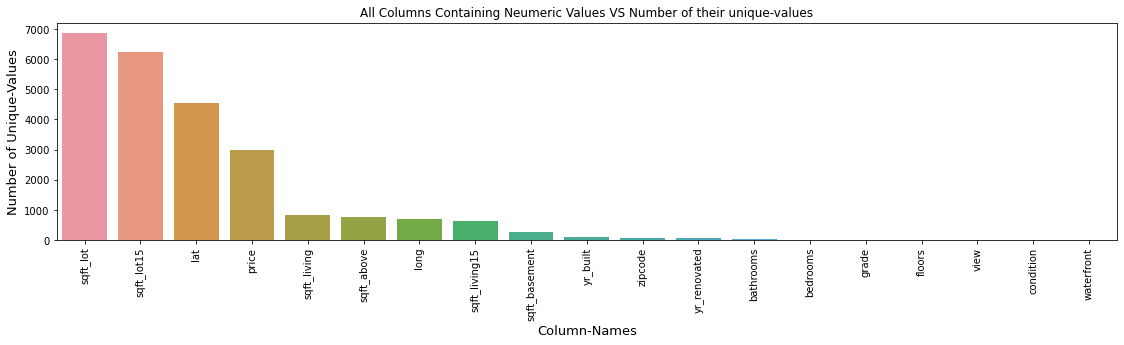

In [5]:
# SEPARATING NUMERIC COLUMNS
numeric_columns = train.select_dtypes(exclude=['object']).columns.values.tolist()
#print(numeric_columns)
print('Number of Neumeric Columns = ',len(numeric_columns))
unique_values=[]
for item in numeric_columns: 
    unique_values.append(train[item].nunique())
numeric_column_list = list(zip(numeric_columns, unique_values))
#(numeric_column_list)
numeric_column_list = sorted(numeric_column_list,key=lambda l:l[1], reverse=True)
numeric_column_list=pd.DataFrame(numeric_column_list, columns=['Column-Names', 'Unique-Values'])
                                                  
                                                  # PLOTTING NUMBER OF UNIQUE-VALUES FOR EACH NUMERIC COLUMNS
plt.subplots(figsize=(19, 4))
sns.barplot(x=numeric_column_list['Column-Names'], y=numeric_column_list['Unique-Values'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('All Columns Containing Neumeric Values VS Number of their unique-values')
plt.show()

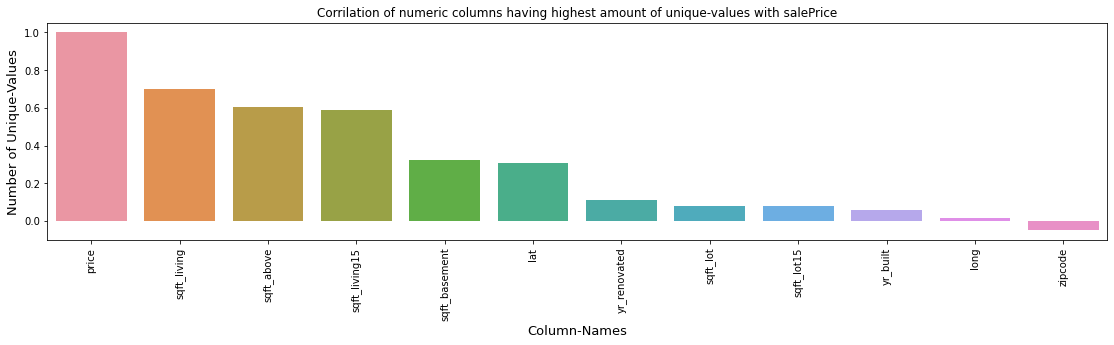

In [6]:
# CHECKING CORRELATION OF THE SELECTED COLUMNS WITH SALEPRICE
highly_unique_columns = numeric_column_list.drop(numeric_column_list[numeric_column_list['Unique-Values'] < 65].index)
#droping columns with unique values less than 65

cols = highly_unique_columns['Column-Names']
#cols = train.columns.values.tolist()
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['price'])))    # .corr is for finding correlation coefficient
    
    '''
    Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
    Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
    '''
    
# MAKING A DATAFRAME TO STORE THE CORRELATIONS     
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)

# VISUALIZING CORRELATIONS GRAPHICALLY
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('Corrilation of numeric columns having highest amount of unique-values with salePrice')
plt.show()

In [7]:
ist['cols'][:9]

3             price
4       sqft_living
5        sqft_above
7     sqft_living15
8     sqft_basement
2               lat
11     yr_renovated
0          sqft_lot
1        sqft_lot15
Name: cols, dtype: object

In [8]:
#train[ist['cols']]

In [9]:
mst_corr_cols = ist['cols'][:9].to_list()
tr_sm = train[mst_corr_cols]
val_sm = val[mst_corr_cols]
ts_sm = test[mst_corr_cols]

In [10]:
train_y = tr_sm['price']
train_x = tr_sm.drop(['price'], axis=1)

test_y = ts_sm['price']
test_x = ts_sm.drop(['price'], axis=1)

val_y = val_sm['price']
val_x = val_sm.drop(['price'], axis=1)

In [11]:
train_y = np.log1p(train_y)
test_y = np.log1p(test_y)
val_y = np.log1p(val_y)

In [12]:
#sklearn linear models -->ElasticNEt, Lasso, BayesianRidge, lassolarsIC
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

#sklearn ensemble models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor

import xgboost as xgb
import lightgbm as lgb

In [13]:
model_lr = LinearRegression()
model_lr.fit(train_x, train_y)

LinearRegression()

In [14]:
#lr_pred = model_lr.predict(test_x)

In [15]:
model_r = Ridge()
model_r.fit(train_x, train_y)

Ridge()

In [16]:
model_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
model_rf.fit(train_x, train_y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [17]:
model_xgb = xgb.XGBRegressor(random_state=42, n_jobs=-1)
model_xgb.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
model_ls = Lasso()
model_ls.fit(train_x, train_y)

Lasso()

In [19]:
model_Els = ElasticNet()
model_Els.fit(train_x, train_y)

ElasticNet()

In [20]:
# PIPELINE AND SCALING PREPROCESSING
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# MODEL SELECTION PACKAGES USED FOR SAMPLING DATASET AND OPTIMISING PARAMETERS
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Pipeline and preprocessing packages imported!
Model selection packages imported!


In [21]:
# initial models 'not tuned'

model_rf = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(),
                        RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100))
model_rf.fit(train_x, train_y)
#model_rf.fit(val_x, val_y)

ValueError: Unknown label type: 'continuous'

In [ ]:
y_pred = model_rf.predict(test_x)

In [ ]:
print(model_rf.score(train_x, train_y))
#print(model_rf.score(val_x, val_y))

In [ ]:
model_xgb = make_pipeline(OrdinalEncoder(), SimpleImputer(),
                        xgb.XGBClassifier(random_state=42, n_jobs=-1, n_estimators=25))
model_xgb.fit(train_x, train_y)
#model_rf.fit(val_x, val_y)
print(model_xgb.score(train_x, train_y))

In [ ]:
y_pred = model_xgb.predict_proba(test_x).T[1]

In [22]:
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha =0.000327, random_state=18))

model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00052, l1_ratio=0.70654, random_state=18))


model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =18)

model_XGB=xgb.XGBRegressor(n_jobs=-1, n_estimators=849, learning_rate=0.015876, 
                           max_depth=58, colsample_bytree=0.599653, colsample_bylevel=0.287441, subsample=0.154134, seed=18)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

forest_reg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                                   max_features=60, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                   min_samples_leaf=1,
                                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                                   n_estimators=70, n_jobs=1, oob_score=False, random_state=42,
                                   verbose=0, warm_start=False)
  

In [23]:
model_Lasso.fit(train_x, train_y)
Lasso_Predictions=np.exp(model_Lasso.predict(test_x))-1
y_pred1=np.exp(model_Lasso.predict(val_x))-1
score1 = model_Lasso.score(val_x, val_y)
print(score1)


model_ENet.fit(train_x, train_y)
ENet_Predictions=np.exp(model_ENet.predict(test_x))-1
y_pred2=np.exp(model_ENet.predict(val_x))-1
score2 = model_ENet.score(val_x, val_y)
print(score2)


model_XGB.fit(train_x, train_y)
XGB_Predictions=np.exp(model_XGB.predict(test_x))-1

model_GBoost.fit(train_x, train_y)
GBoost_Predictions=np.exp(model_GBoost.predict(test_x))-1

model_lgb.fit(train_x, train_y)
lgb_Predictions=np.exp(model_lgb.predict(test_x))-1

#forest_reg.fit(train_x, train_y)
#forest_reg_Predictions=np.exp(forest_reg.predict(test_x))-1

0.6937372627079883
0.6937202156270428
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [24]:
XGB_Predictions

array([546883.1 , 495634.47, 220494.95, ..., 742281.1 , 517649.66,
       362667.6 ], dtype=float32)

In [25]:
ensemble = (Lasso_Predictions + XGB_Predictions + lgb_Predictions + ENet_Predictions)/4

ensemble

array([460770.45303236, 460255.51247869, 240762.05253266, ...,
       620612.42336471, 482702.69020262, 396776.63355277])

In [ ]:
res_col = ['id', 'price']
res_df = pd.DataFrame(rawTest, columns=res_col)

In [ ]:
res_df['id'], res_df['price'] = test_ID, ensemble
res_df['id']= res_df['id'].astype(str).str.zfill(10)
res_df['price']= res_df['price'].round()
res_df['id'] = res_df['id'].astype(str)+test_date.astype(str)
res_df.to_csv('resultEnsm.csv', index=False)

# Ensamble -again

In [26]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
                                        learning_rate=0.01, loss='ls')
'''this(resultGBoostRg) yeilds res score 17.....'''

'this yeilds res score 17.....'

In [36]:
clf = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                         min_samples_split=5, 
                                   loss='ls', random_state =18)
# this(resultGBoostRg2) was not better wstimation. score 18....
#score--> 0.8342707905691829

In [37]:
clf.fit(train_x, train_y)

c:\users\ripon\anaconda3\envs\mldl\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', min_samples_split=5,
                          n_estimators=3000, random_state=18)

In [38]:
clf.score(val_x, val_y)

0.8342707905691829

In [34]:
pred_y = np.exp(clf.predict(test_x))-1
pred_y

array([631779.73889265, 520852.45300408, 227163.01118977, ...,
       684648.61090289, 509803.73682039, 370133.73239143])

In [35]:
res_col = ['id', 'price']
res_df = pd.DataFrame(rawTest, columns=res_col)
res_df['id'], res_df['price'] = test_ID, pred_y
res_df['id']= res_df['id'].astype(str).str.zfill(10)
res_df['price']= res_df['price'].round()
res_df['id'] = res_df['id'].astype(str)+test_date.astype(str)
res_df.to_csv('resultGBoostRg2.csv', index=False)

In [40]:
rawTrain['date'].unique

<bound method Series.unique of 0        20150413T000000
1        20140918T000000
2        20140721T000000
3        20140618T000000
4        20150114T000000
              ...       
12963    20140721T000000
12964    20141111T000000
12965    20150416T000000
12966    20141021T000000
12967    20150414T000000
Name: date, Length: 12968, dtype: object>

In [14]:
#breaking the date into yr, mm, day
rawTrain['date']=pd.to_datetime(rawTrain['date'])
rawTrain['month'] = rawTrain['date'].apply(lambda date:date.month)
rawTrain['year'] = rawTrain['date'].apply(lambda date:date.year)

rawTest['date']=pd.to_datetime(rawTest['date'])
rawTest['month'] = rawTest['date'].apply(lambda date:date.month)
rawTest['year'] = rawTest['date'].apply(lambda date:date.year)

rawVal['date']=pd.to_datetime(rawVal['date'])
rawVal['month'] = rawVal['date'].apply(lambda date:date.month)
rawVal['year'] = rawVal['date'].apply(lambda date:date.year)

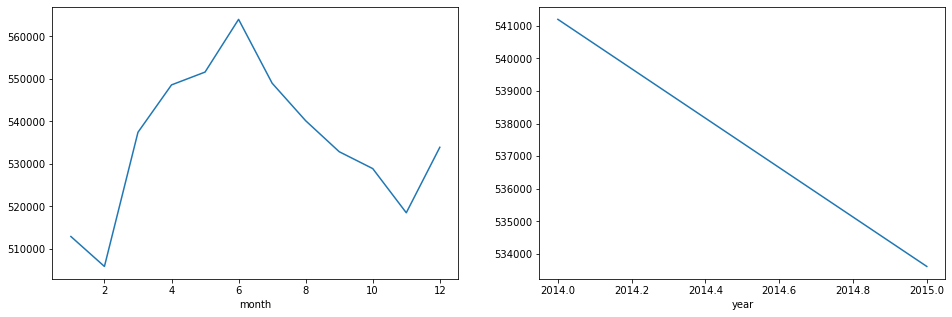

In [15]:
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
rawTrain.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
rawTrain.groupby('year').mean()['price'].plot()

In [51]:
train = rawTrain.drop(['id', 'date'], axis=1)
val = rawVal.drop(['id', 'date'], axis=1)
test = rawTest.drop(['id','date'], axis=1)

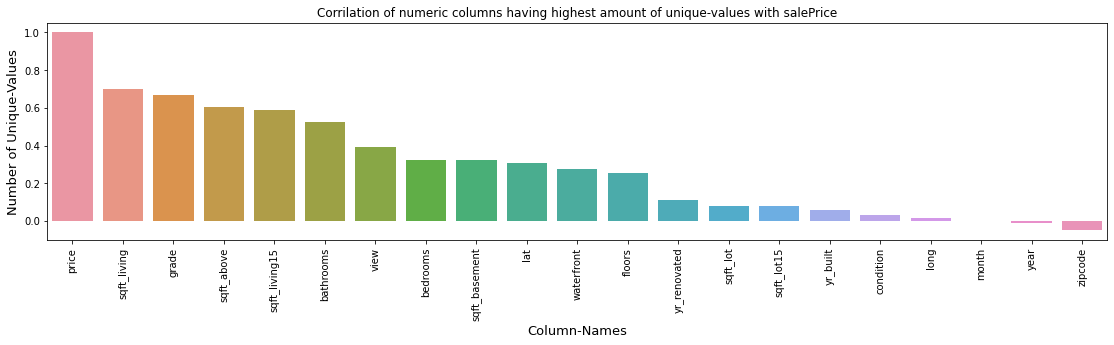

In [59]:
# CHECKING CORRELATION OF THE SELECTED COLUMNS WITH SALEPRICE
#highly_unique_columns = numeric_column_list.drop(numeric_column_list[numeric_column_list['Unique-Values'] < 65].index)
#droping columns with unique values less than 65

#cols = highly_unique_columns['Column-Names']
cols = train.columns.values.tolist()
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['price'])))    # .corr is for finding correlation coefficient
    
    '''
    Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
    Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
    '''
    
# MAKING A DATAFRAME TO STORE THE CORRELATIONS     
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)

# VISUALIZING CORRELATIONS GRAPHICALLY
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('Corrilation of numeric columns having highest amount of unique-values with salePrice')
plt.show()

In [60]:
train_y = train['price']
train_x = train.drop(['price'], axis=1)

test_y = test['price']
test_x = test.drop(['price'], axis=1)

val_y = val['price']
val_x = val.drop(['price'], axis=1)

Feature scaling will help us see all the variables from the same lens (same scale), it will also help our models learn faster.

In [61]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
train_x = s_scaler.fit_transform(train_x.astype(np.float))
val_x = s_scaler.transform(val_x.astype(np.float))
test_x = s_scaler.transform(test_x.astype(np.float))

In [62]:
#model selsction and evaluation
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(train_x, train_y)

regressor.score(val_x, val_y)

0.7179306594392361

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [2]:
# this one is best....O ALLAH!!!
clf = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                         min_samples_split=5, 
                                   loss='ls', random_state =18)
clf.fit(train_x, train_y)

clf.score(val_x, val_y)
#score here --> 0.9159325084237034

NameError: name 'ensemble' is not defined

In [65]:
pred_y = clf.predict(test_x)
pred_y

array([778511.16153904, 480650.1207506 , 189499.73320679, ...,
       899844.19095172, 602861.42418005, 447378.71708889])

In [66]:
res_col = ['id', 'price']
res_df = pd.DataFrame(rawTest, columns=res_col)
res_df['id'], res_df['price'] = test_ID, pred_y
res_df['id']= res_df['id'].astype(str).str.zfill(10)
res_df['price']= res_df['price'].round()
res_df['id'] = res_df['id'].astype(str)+test_date.astype(str)
res_df.to_csv('resultGBoostRg3.csv', index=False)

In [ ]:
res_col = ['id', 'price']
res_df = pd.DataFrame(rawTest, columns=res_col)
res_df['id'], res_df['price'] = test_ID, pred_y
res_df['id']= res_df['id'].astype(str).str.zfill(10)
res_df['price']= res_df['price'].round()
res_df['id'] = res_df['id'].astype(str)+test_date.astype(str)
res_df.to_csv('resultGBoostRg3.csv', index=False)